In [1]:
# import packages
import glob
from pathlib import Path
import scipy.stats
import os
import numpy as np
from datetime import datetime
from datetime import timedelta
import pandas as pd
import calendar
import matplotlib.pyplot as plt
import matplotlib as mpl
import math
import cartopy.crs as ccrs
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from pathos.threading import ThreadPool as Pool

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from f_sr_calculation import *

In [4]:
# work_dir=Path("/scratch/fransjevanoors/global_sr")
work_dir=Path("/mnt/u/LSM root zone/global_sr")

## 1. IWU VS IRRIGATED AREA FRACTION

In [8]:
df = pd.read_csv(f'{work_dir}/output/catchment_characteristics/catchment_characteristics_gswp-p_gleam-ep_gswp-t.csv',index_col=0)
ir = df.ir_mean
ir = ir[ir>0.01]
ir

br_0001850    0.010953
br_0002070    0.024101
br_0001612    0.057811
br_0002077    0.019123
fr_0000841    0.016864
                ...   
fr_0000347    0.010721
es_0000693    0.033156
fr_0000568    0.034826
za_0000075    0.016403
ca_0002259    0.011131
Name: ir_mean, Length: 1445, dtype: float64

In [5]:
# IWU IRRIGATION DATA
iwu = pd.read_csv(f'{work_dir}/output/irrigation/mean_irrigation_all_catchments.csv',index_col=0)
iwu = iwu['iwu_mean_mmday']
iwu = iwu[ir.index]

(0.0, 0.6)

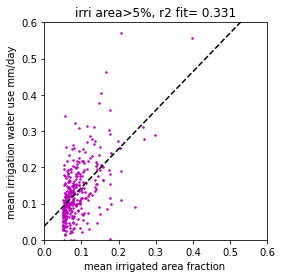

In [8]:
x = ir
y = iwu

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)

xf = np.linspace(0,0.6,100)
yf = intercept + slope*xf

fig=plt.figure(figsize=(4,4))
ax = fig.add_subplot(111)
ax.plot(x,y,'mo',markersize=1.5)
ax.plot(xf,yf,'k--')
ax.set_xlabel('mean irrigated area fraction ')
ax.set_ylabel('mean irrigation water use mm/day')
ax.set_title(f'irri area>5%, r2 fit= {np.round(r_value**2,3)}')
ax.set_xlim(0,0.6)
ax.set_ylim(0,0.6)

## 2. WHERE IRRIGATION AND HOW MUCH?
Use GSIM irrigation data for catchments

In [9]:
df = pd.read_csv(f'{work_dir}/output/catchment_characteristics/catchment_characteristics_gswp-p_gleam-ep_gswp-t.csv',index_col=0)
ir = df.ir_mean
np.max(ir)

0.3983825

Text(0.5, 0.98, 'Fraction of irrigated area in catchment')

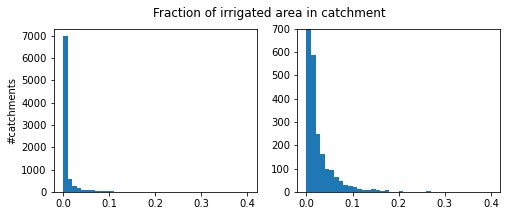

In [10]:
fig = plt.figure(figsize=(8,3))
bins = np.linspace(0,0.4,41)
ax = fig.add_subplot(121)
ax.hist(ir,bins=bins)
ax.set_ylabel(f'#catchments')

ax = fig.add_subplot(122)
ax.hist(ir,bins=bins)
# ax.set_ylabel(f'#catchments')
ax.set_ylim(0,700)

fig.suptitle('Fraction of irrigated area in catchment')

Text(0.5, 1.0, 'Fraction of irrigated area in catchment')

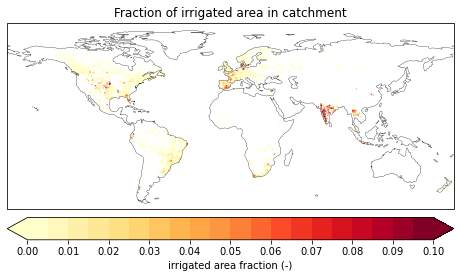

In [11]:
cmap = plt.cm.YlOrRd  # define the colormap
cmaplist = [cmap(i) for i in range(cmap.N)]
cm2 = mpl.colors.LinearSegmentedColormap.from_list(
    'Custom cmap', cmaplist, cmap.N)
bounds = np.linspace(0,0.1,21)
bounds2 = np.linspace(0,0.1,11)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.3)
ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
s = ax.scatter(df.lon,df.lat,c=df.ir_mean,s=0.1,cmap=cm2, norm=norm)
cbar = plt.colorbar(s, orientation='horizontal', label='irrigated area fraction (-)',spacing='proportional',extend='both', pad=0.02, norm=norm,ticks=bounds2)
ax.set_title(f'Fraction of irrigated area in catchment',size=12)

Text(0.5, 1.0, 'irrigated area fraction >0.05')

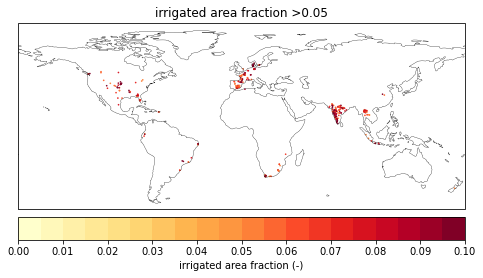

In [12]:
df = df[df.ir_mean>0.05]
# cmap = plt.cm.jet  # define the colormap
cmaplist = [cmap(i) for i in range(cmap.N)]
cm2 = mpl.colors.LinearSegmentedColormap.from_list(
    'Custom cmap', cmaplist, cmap.N)
bounds = np.linspace(0,0.1,21)
bounds2 = np.linspace(0,0.1,11)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.3)
ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
s = ax.scatter(df.lon,df.lat,c=df.ir_mean,s=0.4,cmap=cm2, norm=norm)
cbar = plt.colorbar(s, orientation='horizontal', label='irrigated area fraction (-)',spacing='proportional', pad=0.02, norm=norm,ticks=bounds2)
ax.set_title(f'irrigated area fraction >0.05',size=12)

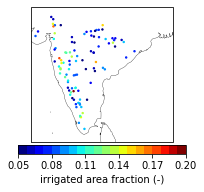

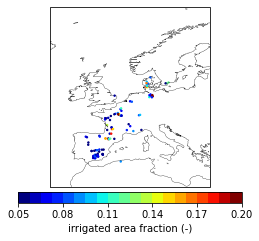

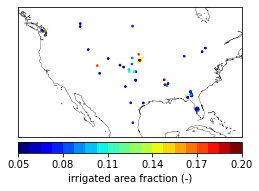

In [13]:
cmap = plt.cm.jet  # define the colormap
cmaplist = [cmap(i) for i in range(cmap.N)]
cm2 = mpl.colors.LinearSegmentedColormap.from_list(
    'Custom cmap', cmaplist, cmap.N)
bounds = np.linspace(0.05,0.2,21)
bounds2 = np.linspace(0.05,0.2,11)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

# INDIA
bounds3 = np.linspace(0.05,0.2,6)
fig = plt.figure(figsize=(3,3))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.3)
ax.set_xlim(70,90)
ax.set_ylim(7,26)
s = ax.scatter(df.lon,df.lat,c=df.ir_mean,s=2,cmap=cm2, norm=norm)
cbar = plt.colorbar(s, orientation='horizontal', label='irrigated area fraction (-)',spacing='proportional', pad=0.02, norm=norm,ticks=bounds3)


# EUROPE
bounds3 = np.linspace(0.05,0.2,6)
fig = plt.figure(figsize=(4,4))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.3)
ax.set_xlim(-15,25)
ax.set_ylim(30,75)
s = ax.scatter(df.lon,df.lat,c=df.ir_mean,s=2,cmap=cm2, norm=norm)
cbar = plt.colorbar(s, orientation='horizontal', label='irrigated area fraction (-)',spacing='proportional', pad=0.02, norm=norm,ticks=bounds3)


# USA
bounds3 = np.linspace(0.05,0.2,6)
fig = plt.figure(figsize=(4,4))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.3)
ax.set_xlim(-130,-70)
ax.set_ylim(20,55)
s = ax.scatter(df.lon,df.lat,c=df.ir_mean,s=3,cmap=cm2, norm=norm)
cbar = plt.colorbar(s, orientation='horizontal', label='irrigated area fraction (-)',spacing='proportional', pad=0.02, norm=norm,ticks=bounds3)


In [14]:
# make list of catchments with > 5% irrigation
df = df[df.ir_mean>0.05]
c = df.index.values
np.savetxt(f'{work_dir}/output/irrigation/catchment_irri_area_5percent.txt',c,fmt='%s')

In [15]:
# IWU IRRIGATION DATA
df = pd.read_csv(f'{work_dir}/output/catchment_characteristics/catchment_characteristics_gswp-p_gleam-ep_gswp-t.csv',index_col=0)

iwu = pd.read_csv(f'{work_dir}/output/irrigation/mean_irrigation_all_catchments.csv',index_col=0)
df2 = pd.concat([df,iwu],axis=1)
df2['iwu_mean_mmyear']=df2['iwu_mean_mmday']*365
df2

,p_mean,ep_mean,q_mean,t_mean,ai,hai,tdiff_max,tdiff_mean,idu_mean,idu_max,...,pop,nld,clt,lc,lit,st.1,lat,lon,iwu_mean_mmday,iwu_mean_mmyear
de_0000778,4.045309,2.057641,0.842493,7.638991,1.965994,0.337366,24.641665,20.637500,2.86,16.13,...,14377.860,0.241560,Snow,Forest,Unconsolidated sediments,NaN,47.723927,11.933343,0.000000,0.000000
br_0001850,4.186528,2.943133,1.030596,25.107997,1.422473,0.967762,6.181352,4.359281,7.14,72.03,...,201182.800,0.491105,Equatorial,Agriculture,Acid plutonic rocks,NaN,-16.616687,-49.718967,0.009453,3.450305
ca_0003156,1.235331,1.331096,0.017540,3.742158,0.928056,1.003734,43.900205,36.056585,5.33,30.03,...,46994.660,0.315056,Snow,Agriculture,Siliciclastic sedimentary rocks,NaN,49.506681,-103.275867,0.000056,0.020438
br_0001299,3.123837,2.907271,1.032392,24.338485,1.074491,1.257753,6.634216,5.093589,4.47,24.80,...,12372.820,0.411808,Equatorial,No dominant class,Metamorphics,NaN,-17.108293,-39.967427,0.002138,0.780316
br_0001843,4.453621,2.944259,1.377108,24.223189,1.512646,0.877896,6.469796,4.538261,7.15,73.73,...,2077434.000,0.342362,Equatorial,Agriculture,Metamorphics,NaN,-16.539263,-49.184522,0.009306,3.396778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ca_0001384,3.196726,1.852481,2.053996,2.880652,1.725645,0.341004,40.004254,33.168757,2.74,11.63,...,12177.410,NaN,Snow,Forest,Metamorphics,NaN,47.253879,-72.245291,0.000000,0.000000
us_0001647,3.412146,2.749842,2.050785,18.061075,1.240852,0.855017,24.183295,20.816630,4.07,18.73,...,2942.327,0.320770,Warm Temperate,Forest,Metamorphics,NaN,33.018864,-83.604070,0.000000,0.000000
gb_0000044,2.269773,1.157692,1.016338,9.472414,1.960603,0.677501,17.949959,13.999706,3.36,17.43,...,312431.700,0.299489,Warm Temperate,Agriculture,Carbonate sedimentary rocks,NaN,53.261171,-1.396872,0.001495,0.545641
br_0000392,4.171185,3.215613,1.172224,25.953768,1.297166,1.004279,4.744549,3.214524,9.28,87.60,...,1688865.000,NaN,Equatorial,Shrubland,No dominant class,NaN,-12.531370,-47.860721,0.001584,0.578340


Text(0.5, 0.98, 'Mean irrigation water use (mm/year)')

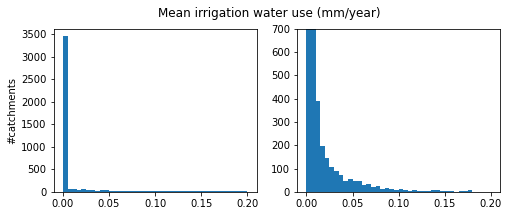

In [16]:
# histogram of IWU data
fig = plt.figure(figsize=(8,3))
bins = np.linspace(0,0.2,41)
ax = fig.add_subplot(121)
ax.hist(df2.iwu_mean_mmyear,bins=bins)
ax.set_ylabel(f'#catchments')

ax = fig.add_subplot(122)
ax.hist(ir,bins=bins)
# ax.set_ylabel(f'#catchments')
ax.set_ylim(0,700)

fig.suptitle('Mean irrigation water use (mm/year)')

Text(0.5, 1.0, 'Mean irrigation water use (mm/year)')

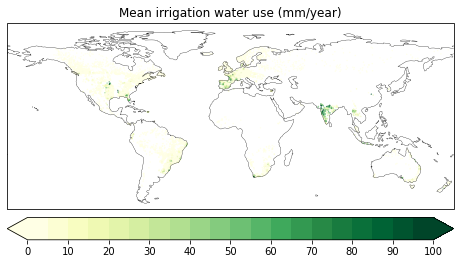

In [17]:
cmap = plt.cm.YlGn  # define the colormap
cmaplist = [cmap(i) for i in range(cmap.N)]
cm2 = mpl.colors.LinearSegmentedColormap.from_list(
    'Custom cmap', cmaplist, cmap.N)
bounds = np.linspace(0,100,21)
bounds2 = np.linspace(0,100,11)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.3)
ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
s = ax.scatter(df2.lon,df2.lat,c=df2.iwu_mean_mmyear,s=0.1,cmap=cm2, norm=norm)
cbar = plt.colorbar(s, orientation='horizontal', label='',spacing='proportional',extend='both', pad=0.02, norm=norm,ticks=bounds2)
ax.set_title(f'Mean irrigation water use (mm/year)',size=12)

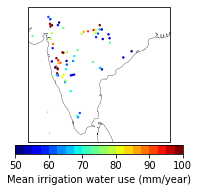

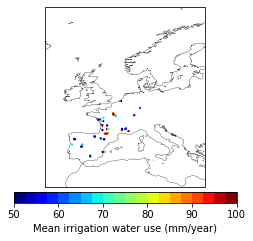

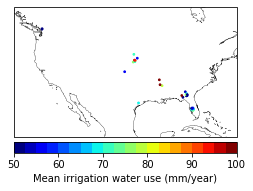

In [18]:
df2 = df2[df2.iwu_mean_mmyear>50]
cmap = plt.cm.jet  # define the colormap
cmaplist = [cmap(i) for i in range(cmap.N)]
cm2 = mpl.colors.LinearSegmentedColormap.from_list(
    'Custom cmap', cmaplist, cmap.N)
bounds = np.linspace(50,100,21)
bounds2 = np.linspace(50,100,11)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

# INDIA
bounds3 = np.linspace(50,100,6)
fig = plt.figure(figsize=(3,3))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.3)
ax.set_xlim(70,90)
ax.set_ylim(7,26)
s = ax.scatter(df2.lon,df2.lat,c=df2.iwu_mean_mmyear,s=2,cmap=cm2, norm=norm)
cbar = plt.colorbar(s, orientation='horizontal', label='Mean irrigation water use (mm/year)',spacing='proportional', pad=0.02, norm=norm,ticks=bounds3)


# EUROPE
# bounds3 = np.linspace(0.05,0.2,6)
fig = plt.figure(figsize=(4,4))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.3)
ax.set_xlim(-15,25)
ax.set_ylim(30,75)
s = ax.scatter(df2.lon,df2.lat,c=df2.iwu_mean_mmyear,s=2,cmap=cm2, norm=norm)
cbar = plt.colorbar(s, orientation='horizontal', label='Mean irrigation water use (mm/year)',spacing='proportional', pad=0.02, norm=norm,ticks=bounds3)


# USA
# bounds3 = np.linspace(0.05,0.2,6)
fig = plt.figure(figsize=(4,4))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.3)
ax.set_xlim(-130,-70)
ax.set_ylim(20,55)
s = ax.scatter(df2.lon,df2.lat,c=df2.iwu_mean_mmyear,s=3,cmap=cm2, norm=norm)
cbar = plt.colorbar(s, orientation='horizontal', label='Mean irrigation water use (mm/year)',spacing='proportional', pad=0.02, norm=norm,ticks=bounds3)


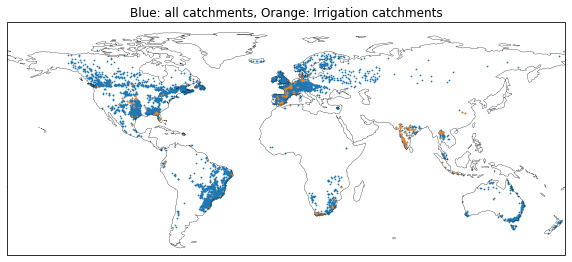

In [97]:
# irri catchments map
snow_ids = np.loadtxt(f'{work_dir}/output/irrigation/catchment_irri_area_5percent.txt',dtype='str')

#shapes
sh = gpd.read_file(f'{work_dir}/output/geo_catchments_sel_area_wb.shp')
sh.index = sh.catch_id
sh['centroid'] = sh.centroid

df = pd.DataFrame(index=snow_ids)
df['lon'] = sh.centroid.x
df['lat'] = sh.centroid.y

df2 = pd.DataFrame(index=sh.index)
df2['lon'] = sh.centroid.x
df2['lat'] = sh.centroid.y

fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.3)
ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
ax.scatter(df2.lon,df2.lat,s=0.5)
ax.scatter(df.lon,df.lat,s=0.5)
ax.set_title('Blue: all catchments, Orange: Irrigation catchments',size=12)
fig.savefig(f'{work_dir}/output/figures/irrigation/map_irri_catchments.jpg',dpi=200,bbox_inches='tight')

## 3. OPTIMIZE F WITHOUT IRRIGATION AREA FRACTION

In [29]:
df = pd.read_csv(f'{work_dir}/output/catchment_characteristics/catchment_characteristics_gswp-p_gleam-ep_gswp-t.csv',index_col=0)
ir = df.ir_mean
ir = ir[ir>0.05]
ar = df.area

In [30]:
# check which catchments are missing
catch_list = np.genfromtxt(f'{work_dir}/output/irrigation/catchment_irri_area_5percent.txt',dtype='str')[:]
el_id_list=[]
for filepath in glob.iglob(f'{work_dir}/output/sr_calculation/sd_catchments/irri/sd/*0.18.csv'):
    f = os.path.split(filepath)[1] # remove full path
    f = f[:-10] # remove .year extension
    el_id_list.append(f)
dif = list(set(catch_list) - set(el_id_list))
len(dif)

18

In [31]:
md_05 = []
md_025 = []
md_075 = []
md_015 = []
md_0 = []
md_02 = []
md_018 = []
md_017 = []
md_iwu = []

md_02_rel = []
md_05_rel = []
md_025_rel = []
md_075_rel = []
md_015_rel = []
md_0_rel = []
md_018_rel = []
md_017_rel = []
md_iwu_rel = []

iwu=[]

ifol = f'{work_dir}/output/sr_calculation/sd_catchments/irri/'

for catch_id in el_id_list:
    f=0.5
    d = pd.read_csv(f'{ifol}/se/{catch_id}_f{f}.csv',index_col=0)
    md_05.append(d.se_used.mean() - d.iwu_mean.mean())
    if (d.iwu_mean.mean()>0):
        md_05_rel.append(((d.se_used.mean() - d.iwu_mean.mean())/d.iwu_mean.mean())*100)
    else:
        md_05_rel.append(np.nan)
    
    f=0
    d = pd.read_csv(f'{ifol}/se/{catch_id}_f{f}.csv',index_col=0)
    md_0.append(d.se_used.mean() - d.iwu_mean.mean())
    if (d.iwu_mean.mean()>0):
        md_0_rel.append(((d.se_used.mean() - d.iwu_mean.mean())/d.iwu_mean.mean())*100)
    else:
        md_0_rel.append(np.nan)
    
    f=0.25
    d = pd.read_csv(f'{ifol}/se/{catch_id}_f{f}.csv',index_col=0)
    md_025.append(d.se_used.mean() - d.iwu_mean.mean())
    if (d.iwu_mean.mean()>0):
        md_025_rel.append(((d.se_used.mean() - d.iwu_mean.mean())/d.iwu_mean.mean())*100)
    else:
        md_025_rel.append(np.nan)
        
    f=0.2
    d = pd.read_csv(f'{ifol}/se/{catch_id}_f{f}.csv',index_col=0)
    md_02.append(d.se_used.mean() - d.iwu_mean.mean())
    if (d.iwu_mean.mean()>0):
        md_02_rel.append(((d.se_used.mean() - d.iwu_mean.mean())/d.iwu_mean.mean())*100)
    else:
        md_02_rel.append(np.nan)
    
    f=0.15
    d = pd.read_csv(f'{ifol}/se/{catch_id}_f{f}.csv',index_col=0)
    md_015.append(d.se_used.mean() - d.iwu_mean.mean())
    if (d.iwu_mean.mean()>0):
        md_015_rel.append(((d.se_used.mean() - d.iwu_mean.mean())/d.iwu_mean.mean())*100)
    else:
        md_015_rel.append(np.nan)
    
    f=0.18
    d = pd.read_csv(f'{ifol}/se/{catch_id}_f{f}.csv',index_col=0)
    md_018.append(d.se_used.mean() - d.iwu_mean.mean())
    if (d.iwu_mean.mean()>0):
        md_018_rel.append(((d.se_used.mean() - d.iwu_mean.mean())/d.iwu_mean.mean())*100)
    else:
        md_018_rel.append(np.nan)
        
    f=0.17
    d = pd.read_csv(f'{ifol}/se/{catch_id}_f{f}.csv',index_col=0)
    md_017.append(d.se_used.mean() - d.iwu_mean.mean())
    if (d.iwu_mean.mean()>0):
        md_017_rel.append(((d.se_used.mean() - d.iwu_mean.mean())/d.iwu_mean.mean())*100)
    else:
        md_017_rel.append(np.nan)
        
    f='iwu'
    d = pd.read_csv(f'{ifol}/se/{catch_id}_f{f}.csv',index_col=0)
    md_iwu.append(d.se_used.mean() - d.iwu_mean.mean())
    if (d.iwu_mean.mean()>0):
        md_iwu_rel.append(((d.se_used.mean() - d.iwu_mean.mean())/d.iwu_mean.mean())*100)
    else:
        md_iwu_rel.append(np.nan)
        
    iwu.append(d.iwu_mean.mean())

In [32]:
df = pd.DataFrame(index=el_id_list[:], columns=['iwu','f0','f0.15','f0.17','f0.18','f0.2','f0.25','f0.5','fiwu'])
df['f0'] = md_0
df['f0.15'] = md_015
df['f0.17'] = md_017
df['f0.18'] = md_018
df['f0.2'] = md_02
df['f0.25'] = md_025
df['f0.5'] = md_05
df['fiwu'] = md_iwu
df['iwu'] = iwu
df = df.dropna()

dfr = pd.DataFrame(index=el_id_list[:], columns=['iwu','f0','f0.15','f0.17','f0.18','f0.2','f0.25','f0.5','fiwu'])
dfr['f0'] = md_0_rel
dfr['f0.15'] = md_015_rel
dfr['f0.17'] = md_017_rel
dfr['f0.18'] = md_018_rel
dfr['f0.2'] = md_02_rel
dfr['f0.25'] = md_025_rel
dfr['f0.5'] = md_05_rel
dfr['fiwu'] = md_iwu_rel
dfr['iwu'] = iwu
dfr = dfr.dropna()

df['irri_areaf'] = ir
dfr['irri_areaf'] = ir
df['irri_area'] = ir*ar
dfr['irri_area'] = ir*ar

dff = df
dffr = dfr

,median,mean,std,q75-q25
f0,-42.41,-47.54,27.26,33.12
f0.15,-6.96,4.47,64.15,49.38
f0.17,-0.38,12.59,72.38,56.59
f0.18,1.27,16.75,76.69,59.81
f0.2,6.76,25.32,85.49,66.20
f0.25,26.01,48.20,109.12,82.49
f0.5,150.12,198.79,259.96,212.56
fiwu,-2.91,-11.16,18.44,13.67


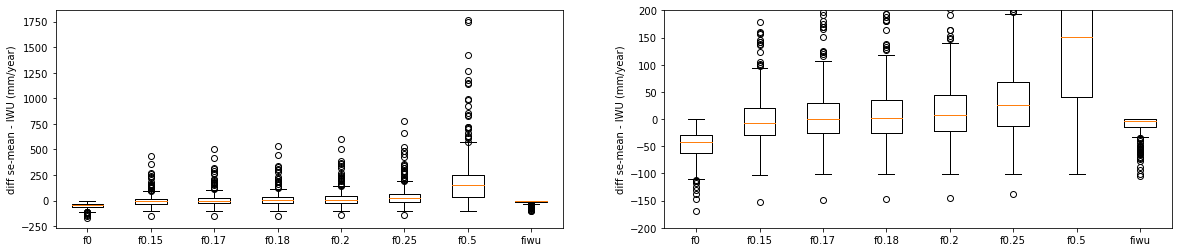

In [33]:
# boxplots of absolute errors between se-mean and IWU for different fvalues
fig = plt.figure(figsize=(20,4))
ax = fig.add_subplot(121)
ax.boxplot(dff.iloc[:,1:-2])
ax.set_xticklabels(dff.iloc[:,1:-2].columns)
ax.set_ylabel('diff se-mean - IWU (mm/year)')

ax = fig.add_subplot(122)
ax.boxplot(dff.iloc[:,1:-2])
ax.set_xticklabels(dff.iloc[:,1:-2].columns)
ax.set_ylim(-200,200)
ax.set_ylabel('diff se-mean - IWU (mm/year)')

d = pd.DataFrame(index=dff.iloc[:,1:-2].columns, columns=['median','mean','std','q75-q25'])
d['median']=np.round(dff.iloc[:,1:-2].median(),2)
d['mean']=np.round(dff.iloc[:,1:-2].mean(),2)
d['std']=np.round(dff.iloc[:,1:-2].std(),2)
d['q75-q25'] = np.round((dff.iloc[:,1:-2].quantile(0.75) - dff.iloc[:,1:-2].quantile(0.25)),2)
d

,median,mean,std,q75-q25
f0,-100.00,-100.00,0.00,0.00
f0.15,-17.01,220.31,2930.62,140.66
f0.17,-4.22,270.07,3384.93,162.29
f0.18,3.11,295.48,3617.72,172.88
f0.2,16.54,348.03,4098.24,196.04
f0.25,55.61,484.53,5323.05,256.97
f0.5,317.73,1321.73,12268.33,631.33
fiwu,-7.14,-23.74,31.61,35.27


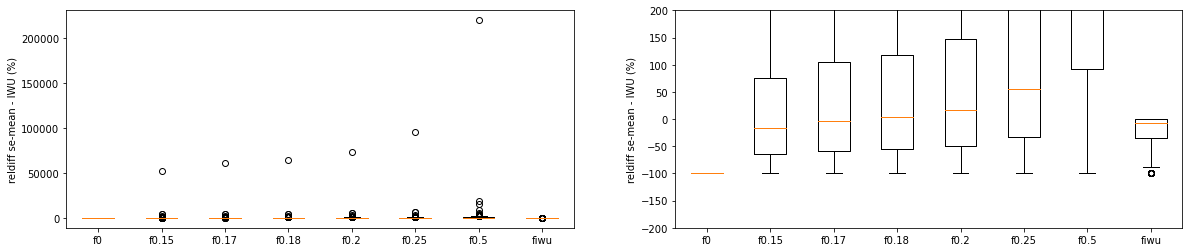

In [34]:
# boxplots of relative errors between se-mean and IWU for different fvalues
fig = plt.figure(figsize=(20,4))
ax = fig.add_subplot(121)
ax.boxplot(dffr.iloc[:,1:-2])
ax.set_xticklabels(dffr.iloc[:,1:-2].columns)
ax.set_ylabel('reldiff se-mean - IWU (%)')

ax = fig.add_subplot(122)
ax.boxplot(dffr.iloc[:,1:-2])
ax.set_xticklabels(dffr.iloc[:,1:-2].columns)
ax.set_ylim(-200,200)
ax.set_ylabel('reldiff se-mean - IWU (%)')

d = pd.DataFrame(index=dffr.iloc[:,1:-2].columns, columns=['median','mean','std','q75-q25'])
d['median']=np.round(dffr.iloc[:,1:-2].median(),2)
d['mean']=np.round(dffr.iloc[:,1:-2].mean(),2)
d['std']=np.round(dffr.iloc[:,1:-2].std(),2)
d['q75-q25'] = np.round((dffr.iloc[:,1:-2].quantile(0.75) - dffr.iloc[:,1:-2].quantile(0.25)),2)
d

## 4. IRRIGATION AREA FRACTION  * F - optimize f

In [35]:
# check which catchments are missing
catch_list = np.genfromtxt(f'{work_dir}/output/irrigation/catchment_irri_area_5percent.txt',dtype='str')[:]
el_id_list=[]
for filepath in glob.iglob(f'{work_dir}/output/sr_calculation/sd_catchments/irri/sd/*2.2ia.csv'):
    f = os.path.split(filepath)[1] # remove full path
    f = f[:-11] # remove .year extension
    el_id_list.append(f)
dif = list(set(catch_list) - set(el_id_list))
len(dif)

18

In [36]:
df = pd.read_csv(f'{work_dir}/output/catchment_characteristics/catchment_characteristics_gswp-p_gleam-ep_gswp-t.csv',index_col=0)
ir = df.ir_mean
ir = ir[ir>0.05]
ar = df.area

In [37]:
md_18 = []
md_12 = []
md_0 = []
md_08 = []
md_1 = []
md_15 = []
md_2 = []
md_25 = []
md_22 = []
md_3 = []
md_iwu = []

md_08_rel = []
md_18_rel = []
md_12_rel = []
md_0_rel = []
md_1_rel = []
md_15_rel = []
md_2_rel = []
md_25_rel = []
md_22_rel = []
md_3_rel = []
md_iwu_rel = []

iwu=[]

ifol = f'{work_dir}/output/sr_calculation/sd_catchments/irri/'

for catch_id in el_id_list:
#     f=0.5
#     d = pd.read_csv(f'{ifol}/se/{catch_id}_f{f}ia.csv',index_col=0)
#     md_05.append(d.se_used.mean() - d.iwu_mean.mean())
#     if (d.iwu_mean.mean()>0):
#         md_05_rel.append(((d.se_used.mean() - d.iwu_mean.mean())/d.iwu_mean.mean())*100)
#     else:
#         md_05_rel.append(np.nan)
    
    f=1.8
    d = pd.read_csv(f'{ifol}/se/{catch_id}_f{f}ia.csv',index_col=0)
    md_18.append(d.se_used.mean() - d.iwu_mean.mean())
    if (d.iwu_mean.mean()>0):
        md_18_rel.append(((d.se_used.mean() - d.iwu_mean.mean())/d.iwu_mean.mean())*100)
    else:
        md_18_rel.append(np.nan)
    
    f=1.0
    d = pd.read_csv(f'{ifol}/se/{catch_id}_f{f}ia.csv',index_col=0)
    md_1.append(d.se_used.mean() - d.iwu_mean.mean())
    if (d.iwu_mean.mean()>0):
        md_1_rel.append(((d.se_used.mean() - d.iwu_mean.mean())/d.iwu_mean.mean())*100)
    else:
        md_1_rel.append(np.nan)
    
    # f=1.2
    # d = pd.read_csv(f'{ifol}/se/{catch_id}_f{f}ia.csv',index_col=0)
    # md_12.append(d.se_used.mean() - d.iwu_mean.mean())
    # if (d.iwu_mean.mean()>0):
    #     md_12_rel.append(((d.se_used.mean() - d.iwu_mean.mean())/d.iwu_mean.mean())*100)
    # else:
    #     md_12_rel.append(np.nan)
        
    f=1.5
    d = pd.read_csv(f'{ifol}/se/{catch_id}_f{f}ia.csv',index_col=0)
    md_15.append(d.se_used.mean() - d.iwu_mean.mean())
    if (d.iwu_mean.mean()>0):
        md_15_rel.append(((d.se_used.mean() - d.iwu_mean.mean())/d.iwu_mean.mean())*100)
    else:
        md_15_rel.append(np.nan)
        
    f=2.0
    d = pd.read_csv(f'{ifol}/se/{catch_id}_f{f}ia.csv',index_col=0)
    md_2.append(d.se_used.mean() - d.iwu_mean.mean())
    if (d.iwu_mean.mean()>0):
        md_2_rel.append(((d.se_used.mean() - d.iwu_mean.mean())/d.iwu_mean.mean())*100)
    else:
        md_2_rel.append(np.nan)
        
    f=2.2
    d = pd.read_csv(f'{ifol}/se/{catch_id}_f{f}ia.csv',index_col=0)
    md_22.append(d.se_used.mean() - d.iwu_mean.mean())
    if (d.iwu_mean.mean()>0):
        md_22_rel.append(((d.se_used.mean() - d.iwu_mean.mean())/d.iwu_mean.mean())*100)
    else:
        md_22_rel.append(np.nan)
        
    f=2.5
    d = pd.read_csv(f'{ifol}/se/{catch_id}_f{f}ia.csv',index_col=0)
    md_25.append(d.se_used.mean() - d.iwu_mean.mean())
    if (d.iwu_mean.mean()>0):
        md_25_rel.append(((d.se_used.mean() - d.iwu_mean.mean())/d.iwu_mean.mean())*100)
    else:
        md_25_rel.append(np.nan)
    
    f=3.0
    d = pd.read_csv(f'{ifol}/se/{catch_id}_f{f}ia.csv',index_col=0)
    md_3.append(d.se_used.mean() - d.iwu_mean.mean())
    if (d.iwu_mean.mean()>0):
        md_3_rel.append(((d.se_used.mean() - d.iwu_mean.mean())/d.iwu_mean.mean())*100)
    else:
        md_3_rel.append(np.nan)
    
    f=0
    d = pd.read_csv(f'{ifol}/se/{catch_id}_f{f}.csv',index_col=0)
    md_0.append(d.se_used.mean() - d.iwu_mean.mean())
    if (d.iwu_mean.mean()>0):
        md_0_rel.append(((d.se_used.mean() - d.iwu_mean.mean())/d.iwu_mean.mean())*100)
    else:
        md_0_rel.append(np.nan)
        
    f='iwu'
    d = pd.read_csv(f'{ifol}/se/{catch_id}_f{f}.csv',index_col=0)
    md_iwu.append(d.se_used.mean() - d.iwu_mean.mean())
    if (d.iwu_mean.mean()>0):
        md_iwu_rel.append(((d.se_used.mean() - d.iwu_mean.mean())/d.iwu_mean.mean())*100)
    else:
        md_iwu_rel.append(np.nan)
        
    iwu.append(d.iwu_mean.mean())

In [38]:
df = pd.DataFrame(index=el_id_list[:], columns=['iwu','f0','f1.0ia','f1.5ia','f1.8ia','f2.0ia','f2.2ia','f2.5ia','f3.0ia','fiwu'])
df['f0'] = md_0
df['f1.0ia'] = md_1
df['f1.8ia'] = md_18
df['f1.5ia'] = md_15
df['f2.0ia'] = md_2
df['f2.2ia'] = md_22
df['f2.5ia'] = md_25
df['f3.0ia'] = md_3
df['fiwu'] = md_iwu

dfr = pd.DataFrame(index=el_id_list[:], columns=['iwu','f0','f1.0ia','f1.5ia','f1.8ia','f2.0ia','f2.2ia','f2.5ia','f3.0ia','fiwu'])
dfr['f0'] = md_0_rel
dfr['f1.0ia'] = md_1_rel
dfr['f1.8ia'] = md_18_rel
dfr['f1.5ia'] = md_15_rel
dfr['f2.0ia'] = md_2_rel
dfr['f2.2ia'] = md_22_rel
dfr['f2.5ia'] = md_25_rel
dfr['f3.0ia'] = md_3_rel
dfr['fiwu'] = md_iwu_rel

df['irri_areaf'] = ir
dfr['irri_areaf'] = ir
df['irri_area'] = ir*ar
dfr['irri_area'] = ir*ar

dfia = df
dfria = dfr


,median,mean,std,q75-q25
f0,-42.41,-47.54,27.26,33.12
f1.0ia,-22.21,-18.96,38.95,31.56
f1.5ia,-12.81,-2.41,54.85,38.07
f1.8ia,-5.04,8.30,66.12,47.23
f2.0ia,-0.02,15.79,74.25,55.16
f2.2ia,4.64,23.63,82.86,63.04
f2.5ia,10.70,35.89,96.62,76.07
f3.0ia,23.56,57.78,121.50,103.26
fiwu,-2.91,-11.16,18.44,13.67


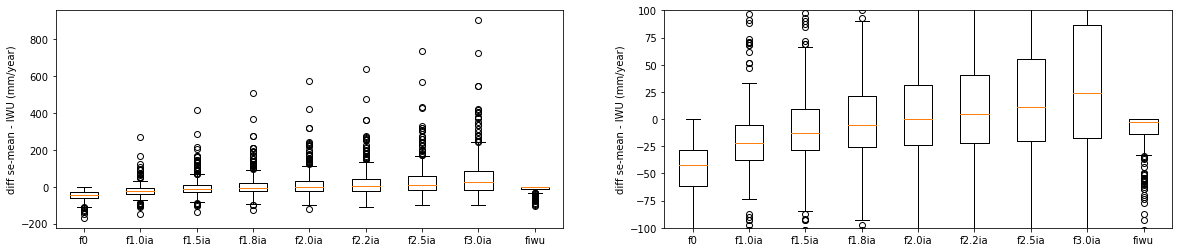

In [39]:
# boxplots of absolute errors between se-mean and IWU for different fvalues
fig = plt.figure(figsize=(20,4))
ax = fig.add_subplot(121)
ax.boxplot(dfia.iloc[:,1:-2])
ax.set_xticklabels(dfia.iloc[:,1:-2].columns)
ax.set_ylabel('diff se-mean - IWU (mm/year)')

ax = fig.add_subplot(122)
ax.boxplot(dfia.iloc[:,1:-2])
ax.set_xticklabels(dfia.iloc[:,1:-2].columns)
ax.set_ylim(-100,100)
ax.set_ylabel('diff se-mean - IWU (mm/year)')

d = pd.DataFrame(index=dfia.iloc[:,1:-2].columns, columns=['median','mean','std'])
d['median']=np.round(dfia.iloc[:,1:-2].median(),2)
d['mean']=np.round(dfia.iloc[:,1:-2].mean(),2)
d['std']=np.round(dfia.iloc[:,1:-2].std(),2)
d['q75-q25'] = np.round((dfia.iloc[:,1:-2].quantile(0.75) - dfia.iloc[:,1:-2].quantile(0.25)),2)

d

,median,mean,std,q75-q25
f0,-100.00,-100.00,0.00,0.00
f1.0ia,-54.15,51.60,1319.61,65.28
f1.5ia,-28.38,136.17,2044.08,101.63
f1.8ia,-12.02,190.10,2503.11,123.60
f2.0ia,-0.10,226.92,2810.16,140.32
f2.2ia,11.84,265.27,3131.36,157.98
f2.5ia,30.10,324.70,3626.91,186.12
f3.0ia,63.05,429.70,4495.53,236.02
fiwu,-7.14,-23.74,31.61,35.27


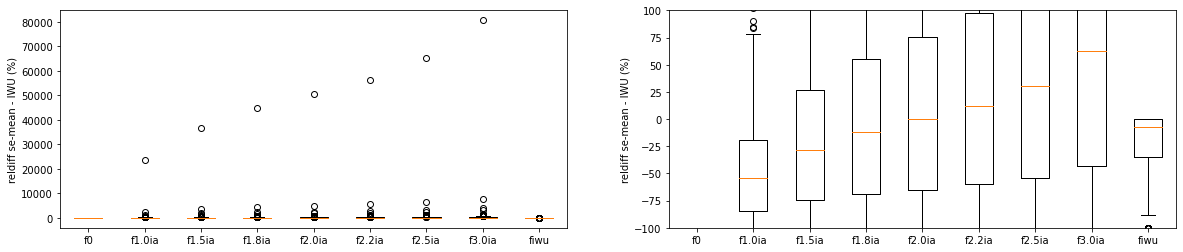

In [40]:
# boxplots of relative errors between se-mean and IWU for different fvalues
dfr2 = dfria.iloc[:,1:-2].dropna()

fig = plt.figure(figsize=(20,4))
ax = fig.add_subplot(121)
ax.boxplot(dfr2)
ax.set_xticklabels(dfr2)
ax.set_ylabel('reldiff se-mean - IWU (%)')

ax = fig.add_subplot(122)
ax.boxplot(dfr2)
ax.set_xticklabels(dfr2)
ax.set_ylim(-100,100)
ax.set_ylabel('reldiff se-mean - IWU (%)')

d = pd.DataFrame(index=dfria.iloc[:,1:-2].columns, columns=['median','mean','std'])
d['median']=np.round(dfria.iloc[:,1:-2].median(),2)
d['mean']=np.round(dfria.iloc[:,1:-2].mean(),2)
d['std']=np.round(dfria.iloc[:,1:-2].std(),2)
d['q75-q25'] = np.round((dfria.iloc[:,1:-2].quantile(0.75) - dfria.iloc[:,1:-2].quantile(0.25)),2)

d

## 5. COMBINE IRRI OPTIMIZED F WITH AND WITHOUT IRRI AREA FRACTION


In [51]:
df = pd.concat([dff,dfia],axis=1)
dfr = pd.concat([dffr, dfria],axis=1)

dfs = df[['f0','fiwu','f0.17','f0.18','f1.8ia','f2.0ia','f2.2ia']]
dfrs = dfr[['f0','fiwu','f0.17','f0.18','f1.8ia','f2.0ia','f2.2ia']]

dfs = dfs.loc[:,~dfs.columns.duplicated()].copy()
dfrs = dfrs.loc[:,~dfrs.columns.duplicated()].copy()

,median,mean,std,q75-q25
f0,-42.41,-47.54,27.26,33.12
fiwu,-2.91,-11.16,18.44,13.67
f0.17,-0.38,12.59,72.38,56.59
f0.18,1.27,16.75,76.69,59.81
f1.8ia,-5.04,8.30,66.12,47.23
f2.0ia,-0.02,15.79,74.25,55.16
f2.2ia,4.64,23.63,82.86,63.04


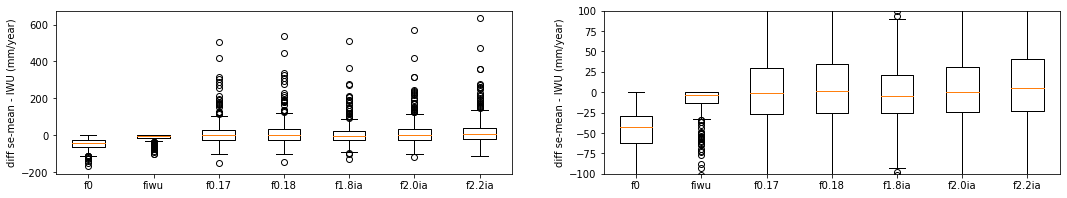

In [60]:
# boxplots of absolute errors between se-mean and IWU for different fvalues
fig = plt.figure(figsize=(18,3))
ax = fig.add_subplot(121)
ax.boxplot(dfs)
ax.set_xticklabels(dfs.columns)
ax.set_ylabel('diff se-mean - IWU (mm/year)')

ax = fig.add_subplot(122)
ax.boxplot(dfs)
ax.set_xticklabels(dfs.columns)
ax.set_ylim(-100,100)
ax.set_ylabel('diff se-mean - IWU (mm/year)')
fig.savefig(f'{work_dir}/output/figures/irrigation/boxplot_abs_errors_iwu.jpg', dpi=300, bbox_inches='tight')

d = pd.DataFrame(index=dfs.columns, columns=['median','mean','std'])
d['median']=np.round(dfs.median(),2)
d['mean']=np.round(dfs.mean(),2)
d['std']=np.round(dfs.std(),2)
d['q75-q25'] = np.round((dfs.quantile(0.75) - dfs.quantile(0.25)),2)

d

,median,mean,std,q75-q25
f0,-100.00,-100.00,0.00,0.00
fiwu,-7.14,-23.74,31.61,35.27
f0.17,-4.22,270.07,3384.93,162.29
f0.18,3.11,295.48,3617.72,172.88
f1.8ia,-12.02,190.10,2503.11,123.60
f2.0ia,-0.10,226.92,2810.16,140.32
f2.2ia,11.84,265.27,3131.36,157.98


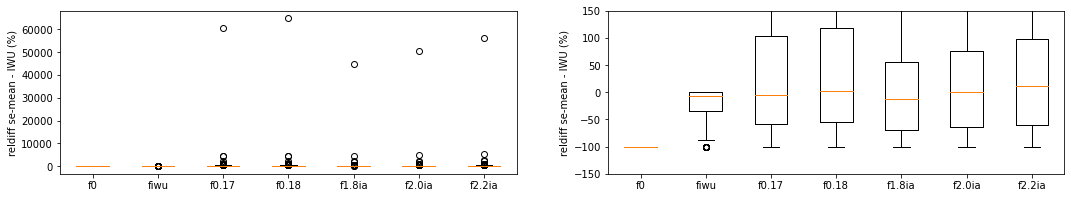

In [61]:
# boxplots of absolute errors between se-mean and IWU for different fvalues
dfrs = dfrs.dropna()

fig = plt.figure(figsize=(18,3))
ax = fig.add_subplot(121)
ax.boxplot(dfrs)
ax.set_xticklabels(dfrs.columns)
ax.set_ylabel('reldiff se-mean - IWU (%)')

ax = fig.add_subplot(122)
ax.boxplot(dfrs)
ax.set_xticklabels(dfrs.columns)
ax.set_ylim(-150,150)
ax.set_ylabel('reldiff se-mean - IWU (%)')
fig.savefig(f'{work_dir}/output/figures/irrigation/boxplot_rel_errors_iwu.jpg', dpi=300, bbox_inches='tight')

d = pd.DataFrame(index=dfrs.columns, columns=['median','mean','std'])
d['median']=np.round(dfrs.median(),2)
d['mean']=np.round(dfrs.mean(),2)
d['std']=np.round(dfrs.std(),2)
d['q75-q25'] = np.round((dfrs.quantile(0.75) - dfrs.quantile(0.25)),2)

d

In [96]:
# plot f values for fiwu vs f0.17
f = 'iwu'
fm = []
for catch_id in el_id_list:
    if os.path.exists(f'{ifol}/se/{catch_id}_f{f}.csv'):
        d = pd.read_csv(f'{ifol}/se/{catch_id}_f{f}.csv',index_col=0)
        fmean = d['f'].mean()
        fm.append(fmean)
        
fmia = []
for catch_id in el_id_list:
    if os.path.exists(f'{ifol}/se/{catch_id}_f2.0ia.csv'):
        d = pd.read_csv(f'{ifol}/se/{catch_id}_f2.0ia.csv',index_col=0)
        fmean = d['f'].mean()
        fmia.append(fmean)

Text(0.5, 1.0, 'mean f with fiwu vs f=2.0ia')

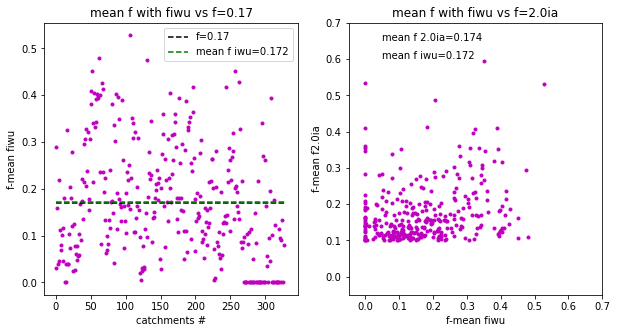

In [95]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(121)
ax.plot(fm, 'mo',markersize=3)
ax.plot([0,330],[0.17,0.17],'k--', label=f'f=0.17')
ax.plot([0,330],[np.mean(fm),np.mean(fm)],'g--', label=f'mean f iwu={np.round(np.mean(fm),3)}')
ax.legend()
ax.set_xlabel('catchments #')
ax.set_ylabel('f-mean fiwu')
ax.set_title('mean f with fiwu vs f=0.17')

ax = fig.add_subplot(122)
ax.plot(fm,fmia, 'mo',markersize=3)
ax.annotate(f'mean f iwu={np.round(np.mean(fm),3)}',[0.05,0.6])
ax.annotate(f'mean f 2.0ia={np.round(np.mean(fmia),3)}',[0.05,0.65])
ax.set_xlabel('f-mean fiwu')
ax.set_ylabel('f-mean f2.0ia')
ax.set_xlim(-0.05,0.7)
ax.set_ylim(-0.05,0.7)
ax.set_title('mean f with fiwu vs f=2.0ia')


## 6. SR CALCULATION FOR IRRI CATCHMENTS

In [10]:
catch_list = np.genfromtxt(f'{work_dir}/output/irrigation/catchment_irri_area_5percent.txt',dtype='str')[:]
el_id_list=[]
for filepath in glob.iglob(f'{work_dir}/output/sr_calculation/sd_catchments/irri/sd/*0.25.csv'):
    f = os.path.split(filepath)[1] # remove full path
    f = f[:-10] # remove .year extension
    el_id_list.append(f)
dif = list(set(catch_list) - set(el_id_list))
len(dif)

18

In [9]:
# RUN SR CALCULATION FOR ALL DIFFERENT F-VALUES

# define directories
sd_dir = f'{work_dir}/output/sr_calculation/sd_catchments'
out_dir = f'{work_dir}/output/sr_calculation/sr_catchments'

# define return periods
rp_array = [2,3,5,10,20,30,40,50,60,70,80]
# f_array = [0,0.15,0.20,0.25,0.5] #parallelization of this does not work properly so run one by one f value - does not take much time
f_array = ['1.8ia']
# c = np.loadtxt(f'{work_dir}/output/sr_calculation/sd_list.txt',dtype=str) 
catch_id_list = el_id_list
sd_dir_list = [sd_dir] * len(catch_id_list)
out_dir_list = [out_dir] * len(catch_id_list) 
rp_array_list = [rp_array] * len(catch_id_list) 
f_list = f_array * len(catch_id_list)
irri_id_list = catch_id_list

run_sr_calculation_parallel(catch_id_list,rp_array_list,sd_dir_list,out_dir_list,f_list,irri_id_list) #run all catchments parallel on delftblue

In [11]:
# without irri area fraction
ifol = f'{work_dir}/output/sr_calculation/sd_catchments/irri/'

sr_df = pd.DataFrame(index=el_id_list, columns=['sr_20_f0','sr_20_f015','sr_20_f017','sr_20_f018','sr_20_f02','sr_20_f025','sr_20_f05','sr_20_fiwu'])
f_list=['0','0.15','0.17','0.18','0.2','0.25','0.5','iwu']
for catch_id in el_id_list:
    for f in f_list:
        if os.path.exists(f'{ifol}/sr/{catch_id}_f{f}.csv'):
            d = pd.read_csv(f'{ifol}/sr/{catch_id}_f{f}.csv',index_col=0)
            if (f=='0'):
                sr_df.loc[catch_id,f'sr_20_f0'] = d.loc[catch_id,'20']
            if (f=='0.15'):
                sr_df.loc[catch_id,f'sr_20_f015'] = d.loc[catch_id,'20']
            if (f=='0.17'):
                sr_df.loc[catch_id,f'sr_20_f017'] = d.loc[catch_id,'20']
            if (f=='0.18'):
                sr_df.loc[catch_id,f'sr_20_f018'] = d.loc[catch_id,'20']
            if (f=='0.2'):
                sr_df.loc[catch_id,f'sr_20_f02'] = d.loc[catch_id,'20']
            if (f=='0.25'):
                sr_df.loc[catch_id,f'sr_20_f025'] = d.loc[catch_id,'20']
            if (f=='0.5'):
                sr_df.loc[catch_id,f'sr_20_f05'] = d.loc[catch_id,'20']
            if (f=='iwu'):
                sr_df.loc[catch_id,f'sr_20_fiwu'] = d.loc[catch_id,'20']
sr_dff = sr_df

In [12]:
# with irri area fraction
ifol = f'{work_dir}/output/sr_calculation/sd_catchments/irri/'

sr_df = pd.DataFrame(index=el_id_list, columns=['sr_20_f0','sr_20_f10ia','sr_20_f15ia','sr_20_f18ia','sr_20_f20ia','sr_20_f22ia','sr_20_f25ia','sr_20_f30ia','sr_20_fiwu'])
f_list=['0','1.0ia','1.5ia','1.8ia','2.0ia','2.2ia','2.5ia','3.0ia','iwu']
for catch_id in el_id_list:
    for f in f_list:
        if os.path.exists(f'{ifol}/sr/{catch_id}_f{f}.csv'):
            d = pd.read_csv(f'{ifol}/sr/{catch_id}_f{f}.csv',index_col=0)
            if (f=='0'):
                sr_df.loc[catch_id,f'sr_20_f0'] = d.loc[catch_id,'20']
            if (f=='1.0ia'):
                sr_df.loc[catch_id,f'sr_20_f10ia'] = d.loc[catch_id,'20']
            if (f=='1.5ia'):
                sr_df.loc[catch_id,f'sr_20_f15ia'] = d.loc[catch_id,'20']
            if (f=='2.0ia'):
                sr_df.loc[catch_id,f'sr_20_f20ia'] = d.loc[catch_id,'20']
            if (f=='2.2ia'):
                sr_df.loc[catch_id,f'sr_20_f22ia'] = d.loc[catch_id,'20']
            if (f=='2.5ia'):
                sr_df.loc[catch_id,f'sr_20_f25ia'] = d.loc[catch_id,'20']
            if (f=='1.8ia'):
                sr_df.loc[catch_id,f'sr_20_f18ia'] = d.loc[catch_id,'20']
            if (f=='3.0'):
                sr_df.loc[catch_id,f'sr_20_f30ia'] = d.loc[catch_id,'20']
            if (f=='iwu'):
                sr_df.loc[catch_id,f'sr_20_fiwu'] = d.loc[catch_id,'20']
                
sr_dfia = sr_df

In [14]:
# combine the two dataframes
sr_df = pd.concat([sr_dff,sr_dfia],axis=1)
sr_df = sr_df.loc[:,~sr_df.columns.duplicated()].copy()
sr_df.to_csv(f'{work_dir}/output/sr_calculation/sd_catchments/irri/sr_df_irri.csv')

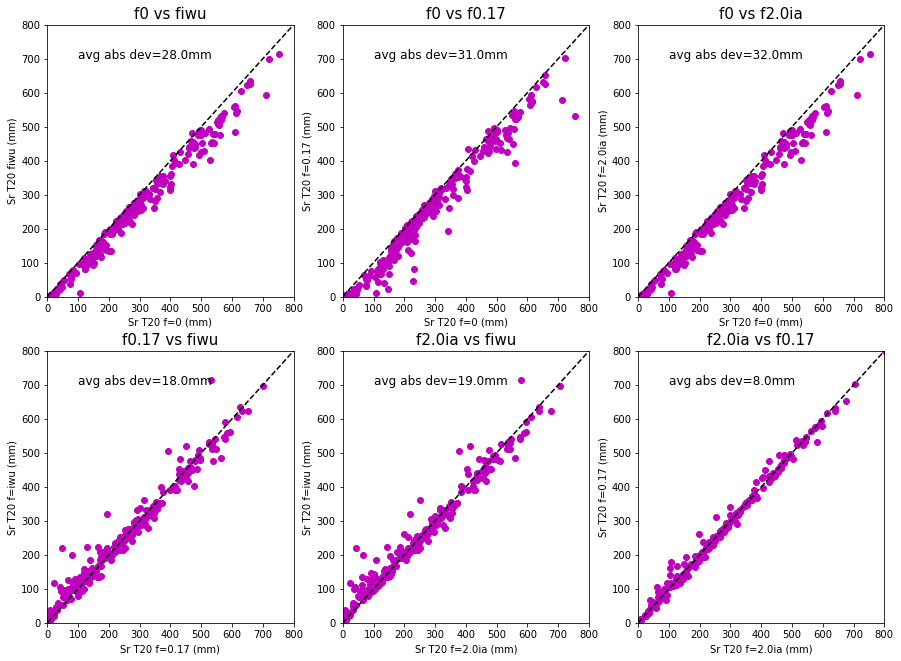

In [15]:
sr_df = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/irri/sr_df_irri.csv', index_col=0)

fig = plt.figure(figsize=(15,11))
ax = fig.add_subplot(231)
ax.plot(sr_df.sr_20_f0, sr_df.sr_20_fiwu, 'mo')
ax.plot([0,900],[0,900],'k--')
ax.set_xlabel('Sr T20 f=0 (mm)')
ax.set_ylabel('Sr T20 fiwu (mm)')
ax.annotate(f'avg abs dev={np.round(abs(sr_df.sr_20_f0-sr_df.sr_20_fiwu).mean(),0)}mm',[100,700],size=12)
ax.set_xlim(0,800)
ax.set_ylim(0,800)
ax.set_title('f0 vs fiwu',fontsize=15)

ax = fig.add_subplot(232)
ax.plot(sr_df.sr_20_f0, sr_df.sr_20_f017, 'mo')
ax.plot([0,900],[0,900],'k--')
ax.set_xlabel('Sr T20 f=0 (mm)')
ax.set_ylabel('Sr T20 f=0.17 (mm)')
ax.annotate(f'avg abs dev={np.round(abs(sr_df.sr_20_f0-sr_df.sr_20_f017).mean(),0)}mm',[100,700],size=12)
ax.set_xlim(0,800)
ax.set_ylim(0,800)
ax.set_title('f0 vs f0.17',fontsize=15)

ax = fig.add_subplot(233)
ax.plot(sr_df.sr_20_f0, sr_df.sr_20_fiwu, 'mo')
ax.plot([0,900],[0,900],'k--')
ax.set_xlabel('Sr T20 f=0 (mm)')
ax.set_ylabel('Sr T20 f=2.0ia (mm)')
ax.annotate(f'avg abs dev={np.round(abs(sr_df.sr_20_f0-sr_df.sr_20_f20ia).mean(),0)}mm',[100,700],size=12)
ax.set_xlim(0,800)
ax.set_ylim(0,800)
ax.set_title('f0 vs f2.0ia',fontsize=15)

ax = fig.add_subplot(234)
ax.plot(sr_df.sr_20_f017, sr_df.sr_20_fiwu, 'mo')
ax.plot([0,900],[0,900],'k--')
ax.set_xlabel('Sr T20 f=0.17 (mm)')
ax.set_ylabel('Sr T20 f=iwu (mm)')
ax.annotate(f'avg abs dev={np.round(abs(sr_df.sr_20_f017-sr_df.sr_20_fiwu).mean(),0)}mm',[100,700],size=12)
ax.set_xlim(0,800)
ax.set_ylim(0,800)
ax.set_title('f0.17 vs fiwu',fontsize=15)

ax = fig.add_subplot(235)
ax.plot(sr_df.sr_20_f20ia, sr_df.sr_20_fiwu, 'mo')
ax.plot([0,900],[0,900],'k--')
ax.set_xlabel('Sr T20 f=2.0ia (mm)')
ax.set_ylabel('Sr T20 f=iwu (mm)')
ax.annotate(f'avg abs dev={np.round(abs(sr_df.sr_20_f20ia-sr_df.sr_20_fiwu).mean(),0)}mm',[100,700],size=12)
ax.set_xlim(0,800)
ax.set_ylim(0,800)
ax.set_title('f2.0ia vs fiwu',fontsize=15)

ax = fig.add_subplot(236)
ax.plot(sr_df.sr_20_f20ia, sr_df.sr_20_f017, 'mo')
ax.plot([0,900],[0,900],'k--')
ax.set_xlabel('Sr T20 f=2.0ia (mm)')
ax.set_ylabel('Sr T20 f=0.17 (mm)')
ax.annotate(f'avg abs dev={np.round(abs(sr_df.sr_20_f20ia-sr_df.sr_20_f017).mean(),0)}mm',[100,700],size=12)
ax.set_xlim(0,800)
ax.set_ylim(0,800)
ax.set_title('f2.0ia vs f0.17',fontsize=15)

fig.savefig(f'{work_dir}/output/figures/irrigation/sr_differences_f_irrigation.jpg', dpi=300, bbox_inches='tight')


In [33]:
f0_e = sr_df.sr_20_f0-sr_df.sr_20_fiwu
f017_e = sr_df.sr_20_f017-sr_df.sr_20_fiwu
f20ia_e =  sr_df.sr_20_f20ia-sr_df.sr_20_fiwu

f0_er = (sr_df.sr_20_f0-sr_df.sr_20_fiwu)/sr_df.sr_20_fiwu * 100
f017_er = (sr_df.sr_20_f017-sr_df.sr_20_fiwu)/sr_df.sr_20_fiwu * 100
f20ia_er =  (sr_df.sr_20_f20ia-sr_df.sr_20_fiwu)/sr_df.sr_20_fiwu * 100

e_df = pd.DataFrame(index=sr_df.index, columns=['f0_fiwu','f017_fiwu','f20ia_fiwu'])
e_df['f0_fiwu'] = f0_e
e_df['f017_fiwu'] = f017_e
e_df['f20ia_fiwu'] = f20ia_e

er_df = pd.DataFrame(index=sr_df.index, columns=['f0_fiwu','f017_fiwu','f20ia_fiwu'])
er_df['f0_fiwu'] = f0_er
er_df['f017_fiwu'] = f017_er
er_df['f20ia_fiwu'] = f20ia_er

,median,mean,std,q75-q25
f0_fiwu,22.60,27.84,22.93,25.43
f017_fiwu,2.47,-2.29,30.39,21.70
f20ia_fiwu,4.60,-3.07,31.07,22.54


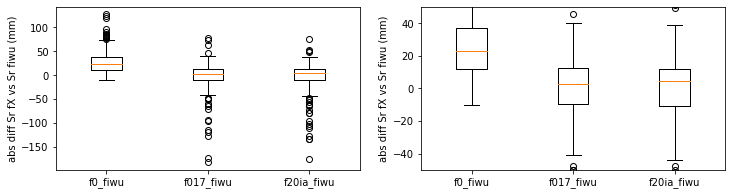

In [34]:
# boxplots of absolute errors between se-mean and IWU for different fvalues
e_df = e_df.dropna()
er_df = er_df.dropna()

fig = plt.figure(figsize=(12,3))
ax = fig.add_subplot(121)
ax.boxplot(e_df)
ax.set_xticklabels(e_df.columns)
ax.set_ylabel('abs diff Sr fX vs Sr fiwu (mm)')

ax = fig.add_subplot(122)
ax.boxplot(e_df)
ax.set_xticklabels(e_df.columns)
ax.set_ylabel('abs diff Sr fX vs Sr fiwu (mm)')
ax.set_ylim(-50,50)
# fig.savefig(f'{work_dir}/output/figures/irrigation/boxplot_rel_errors_iwu.jpg', dpi=300, bbox_inches='tight')

d = pd.DataFrame(index=e_df.columns, columns=['median','mean','std'])
d['median']=np.round(e_df.median(),2)
d['mean']=np.round(e_df.mean(),2)
d['std']=np.round(e_df.std(),2)
d['q75-q25'] = np.round((e_df.quantile(0.75) - e_df.quantile(0.25)),2)

d

,median,mean,std,q75-q25
f0_fiwu,9.07,19.47,57.32,12.98
f017_fiwu,0.85,-3.26,16.20,9.20
f20ia_fiwu,1.54,-4.05,16.82,9.16


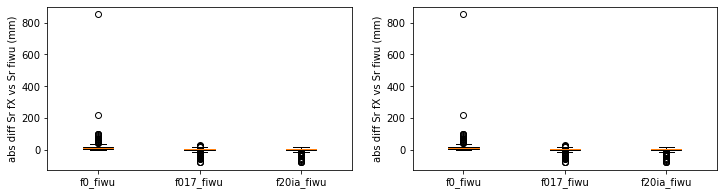

In [30]:
# boxplots of absolute errors between se-mean and IWU for different fvalues
er_df = er_df.dropna()

fig = plt.figure(figsize=(12,3))
ax = fig.add_subplot(121)
ax.boxplot(er_df)
ax.set_xticklabels(e_df.columns)
ax.set_ylabel('abs diff Sr fX vs Sr fiwu (mm)')

ax = fig.add_subplot(122)
ax.boxplot(er_df)
ax.set_xticklabels(e_df.columns)
ax.set_ylabel('abs diff Sr fX vs Sr fiwu (mm)')
# fig.savefig(f'{work_dir}/output/figures/irrigation/boxplot_rel_errors_iwu.jpg', dpi=300, bbox_inches='tight')

d = pd.DataFrame(index=er_df.columns, columns=['median','mean','std'])
d['median']=np.round(er_df.median(),2)
d['mean']=np.round(er_df.mean(),2)
d['std']=np.round(er_df.std(),2)
d['q75-q25'] = np.round((er_df.quantile(0.75) - er_df.quantile(0.25)),2)

d

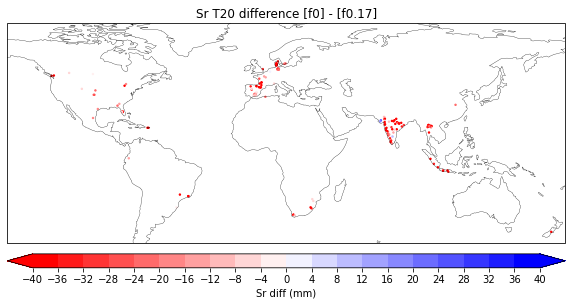

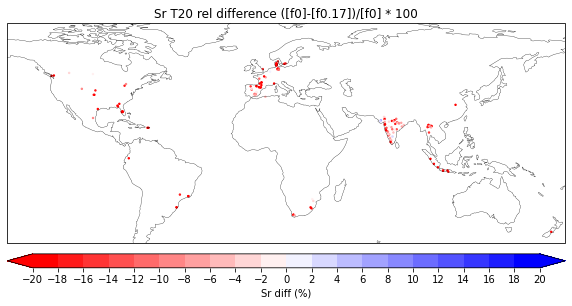

In [104]:
# map sr differences
sr_df['diff'] = sr_df['sr_20_f017']-sr_df['sr_20_f0']
sr_df['rdiff'] = (sr_df['sr_20_f017']-sr_df['sr_20_f0'])/sr_df['sr_20_f0'] * 100

#shapes
sh = gpd.read_file(f'{work_dir}/output/geo_catchments_sel_area_wb.shp')
sh.index = sh.catch_id
sh['centroid'] = sh.centroid

sr_df['lon'] = sh.centroid.x
sr_df['lat'] = sh.centroid.y

cm = plt.cm.bwr_r

# ABSOLUTE DIFF
bounds = np.linspace(-40,40,21)
bounds2 = np.linspace(-40,40,11)
norm = mpl.colors.BoundaryNorm(bounds, cm.N)

fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.3)
ax.set_xlim(-150,180)
ax.set_ylim(-50,80)
s=ax.scatter(sr_df.lon,sr_df.lat,c=sr_df['diff'],s=2,cmap=cm,norm=norm)
cbar = plt.colorbar(s, orientation='horizontal', label='Sr diff (mm)',extend='both', pad=0.02, norm=norm,ticks=bounds,aspect=40)
ax.set_title('Sr T20 difference [f0] - [f0.17]')
fig.savefig(f'{work_dir}/output/figures/irrigation/map_sr_absdiff_f0_f017.jpg',dpi=300,bbox_inches='tight')

# RELATIVE DIFF
bounds = np.linspace(-20,20,21)
bounds2 = np.linspace(-20,20,11)
norm = mpl.colors.BoundaryNorm(bounds, cm.N)

fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.3)
ax.set_xlim(-150,180)
ax.set_ylim(-50,80)
s=ax.scatter(sr_df.lon,sr_df.lat,c=sr_df['rdiff'],s=2,cmap=cm,norm=norm)
cbar = plt.colorbar(s, orientation='horizontal', label='Sr diff (%)',extend='both', pad=0.02, norm=norm,ticks=bounds,aspect=40)
ax.set_title('Sr T20 rel difference ([f0]-[f0.17])/[f0] * 100')
fig.savefig(f'{work_dir}/output/figures/irrigation/map_sr_reldiff_f0_f017.jpg',dpi=300,bbox_inches='tight')

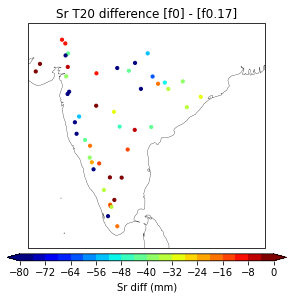

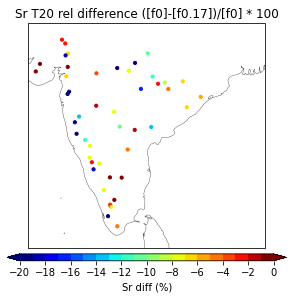

In [115]:
# ABSOLUTE DIFF
cm = plt.cm.jet

bounds = np.linspace(-80,0,21)
bounds2 = np.linspace(-80,0,11)
norm = mpl.colors.BoundaryNorm(bounds, cm.N)

fig = plt.figure(figsize=(5,5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.3)
ax.set_xlim(70,90)
ax.set_ylim(7,26)
s=ax.scatter(sr_df.lon,sr_df.lat,c=sr_df['diff'],s=10,cmap=cm,norm=norm)
cbar = plt.colorbar(s, orientation='horizontal', label='Sr diff (mm)',extend='both', pad=0.02, norm=norm,ticks=bounds2,aspect=40)
ax.set_title('Sr T20 difference [f0] - [f0.17]')
fig.savefig(f'{work_dir}/output/figures/irrigation/map_sr_absdiff_f0_f017_india.jpg',dpi=300,bbox_inches='tight')

# RELATIVE DIFF
bounds = np.linspace(-20,0,21)
bounds2 = np.linspace(-20,0,11)
norm = mpl.colors.BoundaryNorm(bounds, cm.N)

fig = plt.figure(figsize=(5,5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.3)
ax.set_xlim(70,90)
ax.set_ylim(7,26)
s=ax.scatter(sr_df.lon,sr_df.lat,c=sr_df['rdiff'],s=10,cmap=cm,norm=norm)
cbar = plt.colorbar(s, orientation='horizontal', label='Sr diff (%)',extend='both', pad=0.02, norm=norm,ticks=bounds2,aspect=40)
ax.set_title('Sr T20 rel difference ([f0]-[f0.17])/[f0] * 100')
fig.savefig(f'{work_dir}/output/figures/irrigation/map_sr_reldiff_f0_f017_india.jpg',dpi=300,bbox_inches='tight')